### DSTA

#### Chapter I - Food Webs

##### This Python3 exercise notebook is derived from the original Python2 notebook for Ch. 1 of Caldarelli-Cheesa's textbook (CC). 

This model solution is only available from the [class repository](https://github.com/ale66/dsta).

You may keep the [NetworkX documentation](https://networkx.org/documentation/stable/index.html) at hand.


Which Python version is running?

In [1]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


Which dataset is used?

Please find the dataset for the other  wet areas from the [class repo](https://github.com/ale66/dsta).

In [3]:
FILE = './data/Little_Rock_Lake.txt'

FILE = './data/Grassland.txt'
FILE = './data/St_Marks_Seagrass.txt'
FILE = './data/St_Martin_Island.txt'
FILE = './data/Silwood_Park.txt'

## Import packages

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

###  Q1. Draw an undirected graph from an adjacency matrix

In [5]:
adjacency_matrix = [
    [0,1,0,1],
    [1,0,1,1],
    [0,1,0,0],
    [1,1,0,0]
    ]

A = np.array(adjacency_matrix)

G = nx.from_numpy_array(A)


Visualisation.

Please be aware of potential issues with the decorator module of `networkx`.

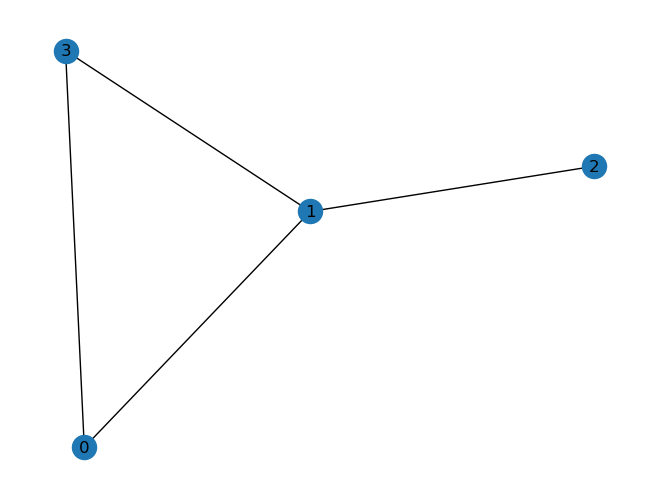

In [8]:

nx.draw(G, with_labels=True)


If nx.draw returns an error then please check and update the precise version number at execution time

``pip install decorator==5.0.9 ``

then restart the kernel.

In [9]:
type(G)

networkx.classes.graph.Graph

#### Browsing the rows

In [10]:
for row in adjacency_matrix:
    print(row)

[0, 1, 0, 1]
[1, 0, 1, 1]
[0, 1, 0, 0]
[1, 1, 0, 0]


#### Browsing the link information

In [ ]:
for row in adjacency_matrix:
    for a_ij in row:
        print(a_ij, end=" ")

    print("\r")

####  Q2. Draw the directed graph from adjacency matrix

For directed networks, in general their adjacency matrix is asymmetric.

So, for instance, a non-zero element in row 2, column 3 means that there is an
arc (directed edge) from node 2 towards node 3.

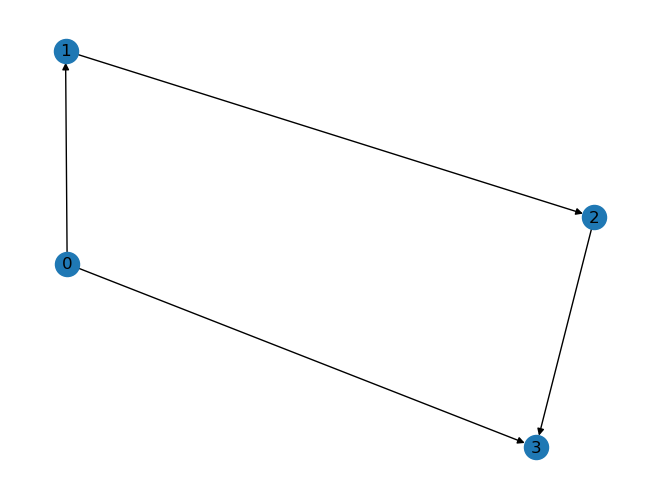

In [11]:

adjacency_matrix_directed = [
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1],
    [0,0,0,0]
    ]

AD = np.array(adjacency_matrix_directed)

GR = nx.from_numpy_array(AD, create_using=nx.MultiDiGraph())

nx.draw(GR, with_labels=True)


In [12]:
type(GR)

networkx.classes.multidigraph.MultiDiGraph

In [13]:
# print the out-neighbors 
for edge in GR.out_edges(2):
    print(edge)

(2, 3)


In [14]:
# print the in-neighbors
for edge in GR.in_edges(3):
    print(edge)

(0, 3)
(2, 3)


#### Basic Statistics

In [15]:
# The number of species is the number of rows or columns of
# the adjacency matrix
num_species = len(adjacency_matrix_directed[0])

# The number of links or predations is the non-zero elements
# of the adjacency matrix (this holds for directed graphs)
num_predations = 0
for i in range(num_species):
    for j in range(num_species):
        if adjacency_matrix_directed[i][j] != 0:
            num_predations = num_predations + 1

# To check if a species is a Basal (B), an Intermediate (I) or
# a Top (T) one  we have to check the presence of 1s both in
# the row and in the column of each species
row_count = [0,0,0,0]
column_count = [0,0,0,0]

for i in range(num_species):
    for j in range(num_species):
        row_count[i] += adjacency_matrix_directed[i][j]
        column_count[j] += adjacency_matrix_directed[i][j]

number_B = 0
number_I = 0
number_T = 0

# Remember: incoming edge means being a hunter!
for n in range(num_species):
    if row_count[n] == 0:
        number_T += 1
        continue
    if column_count[n] == 0:
        number_B += 1
        continue
    else:
        number_I += 1

print("number of species", num_species)
print("number of predations", num_predations)
print("classes Basal, Top, Intermediate: ", number_B, number_T, number_I)
print("connectance", float(num_predations) / float(num_species ** 2))

number of species 4
number of predations 4
classes Basal, Top, Intermediate:  1 1 2
connectance 0.25


In [16]:
np.array(adjacency_matrix_directed)

array([[0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [17]:
print(row_count, column_count)

[2, 1, 1, 0] [0, 1, 1, 2]


#### Explore node degree distribution

In [18]:
# For the undirected network
degree_node_1 = 0

for j in adjacency_matrix[1]:
    degree_node_1 += j
print ("degree of node 1:",degree_node_1)

# For the directed case we already calculated the sum over
# the rows and columns for the adjacency_matrix_directed
out_degree_node_2 = row_count[2]
in_degree_node_3 = column_count[3]

print( "out_degree node 2:", out_degree_node_2)
print ("in_degree node 3:", in_degree_node_3)

degree of node 1: 3
out_degree node 2: 1
in_degree node 3: 2


####  Q3. Draw the histogram of degree distribution from adjacency matrix

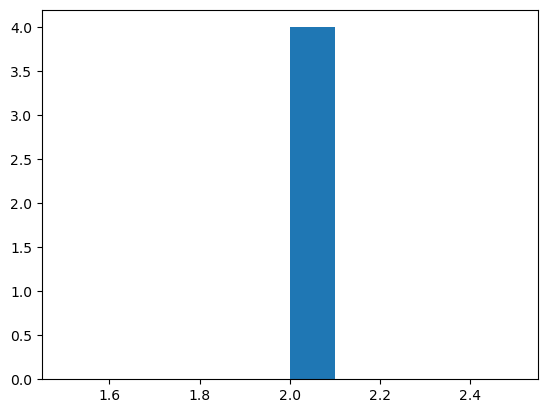

In [19]:
def plot_degree_dist(graph):
    """
    :param graph: A directed or undirected graph

    Creates a frequency bar plot with the degree of
    the nodes within the graph
    """
    # print(G.nodes())
    degrees = [graph.degree(n) for n in graph.nodes()]

    # print(degrees)
    plt.hist(degrees)
    plt.show()

plot_degree_dist(GR)
# plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

#### Degree in Networkx

In [20]:
# Generate an empty graph
GE = nx.Graph()

# define the nodes
GE.add_node(1)
GE.add_node(2)
GE.add_node(3)
GE.add_node(4)

# link the nodes
GE.add_edge(1,2)
GE.add_edge(1,4)
GE.add_edge(2,3)
GE.add_edge(2,4)

# degree of the node 2
print(GE.degree(2))

3


####  Q4. Draw the graph and degree distribution histogram for the above.

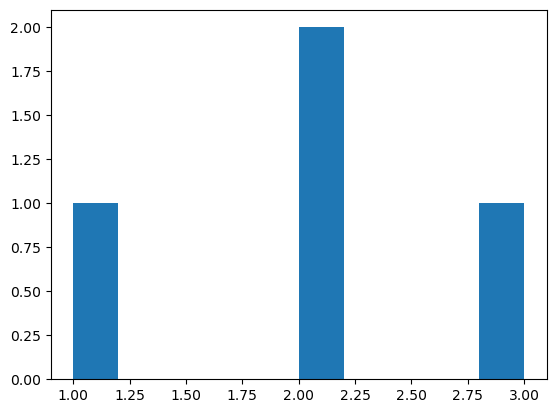

In [21]:
# your solution here
plot_degree_dist(GE)

#### Clustering Coefficient (Local Version for a single Node) for an Undirected Graph

Details on Clustering Coefficient for Graphs [here](https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/) and [here](https://en.wikipedia.org/wiki/Clustering_coefficient)

In [22]:
adjacency_matrix[1]

[1, 0, 1, 1]

In [23]:
row = 1 # Stands for node 1 (count starts from 0)
node_index_count = 0
node_index_list = []

# Get nodes connected to node 1
for a_ij in adjacency_matrix[row]:
    if a_ij == 1:
        node_index_list.append(node_index_count)
    node_index_count += 1

print("\r")
print(node_index_list)

# We check whether all possible neighbouring couples are linked
neighb_conn = 0

for n1 in node_index_list:
    for n2 in node_index_list:
        if adjacency_matrix[n1][n2] == 1:
            neighb_conn = neighb_conn + 1

# we have indeed counted them twice...
neighb_conn = neighb_conn / 2.0
print(neighb_conn)

# Finally the clustering coefficient for node '1' is given by the expression:
clustering_coefficient = neighb_conn / (degree_node_1 * (degree_node_1 - 1) / 2.0)

print(clustering_coefficient)


[0, 2, 3]
1.0
0.3333333333333333


#### Check calculations with networkx method

In [ ]:
all_clustering_coefficients = nx.clustering(G)
print(f"All Clustering Coefficients: {all_clustering_coefficients}")
print(f"Node 1 Clustering Coefficient: {all_clustering_coefficients[1]}")

#### Compute distance with Breadth-First Search

Details on Breadth First Search [here](https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/) and [here](https://en.wikipedia.org/wiki/Breadth-first_search)

#### Create the undirected graph

('B', 'C') 




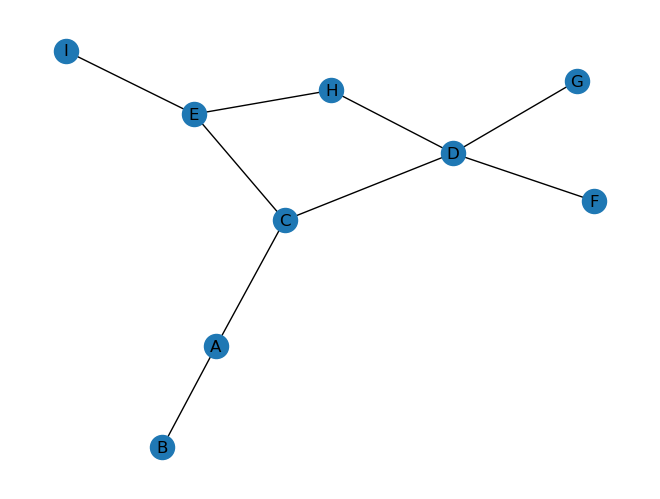

In [26]:
GU = nx.Graph()
GU.add_edges_from([
    ('A','B'),
    ('A','C'),
    ('C','D'),
    ('C','E'),
    ('D','F'),
    ('D','H'),
    ('D','G'),
    ('E','H'),
    ('E','I')
    ])

# Example of printing neighbors of a node 'A'
print(tuple(GU.neighbors('A')), "\n\n")

nx.draw(GU, with_labels=True)

In [27]:
# Each graph node has an empty dictionary
print(GU.nodes["C"])
list(GU.neighbors("C"))

{}


['A', 'D', 'E']

#### Using the first node as root, find the distance of every single node from the root.

In [29]:
root_node = 'A'

queue = []
queue.append('A')

# Distance of root node vs itself
GU.nodes['A']["distance"] = 0

while len(queue):
    working_node = queue.pop(0)

    # Uncomment the following 2 lines to print more output
    print(f"Working Node: {working_node}")
    print(f"{working_node} Neighbors: {list(GU.neighbors(working_node))}")

    # Iterate through current node neighbors
    for n in GU.neighbors(working_node):
        if len(GU.nodes[n]) == 0:  # Checks if a distance has been assigned
            GU.nodes[n]["distance"] = GU.nodes[working_node]["distance"] + 1
            queue.append(n)

for n in GU.nodes():
    print (n, GU.nodes[n]["distance"])


Working Node: A
A Neighbors: ['B', 'C']
A 0
B 1
C 1
D 2
E 2
F 3
H 3
G 3
I 3


In [30]:
GU.nodes["B"]

{'distance': 1}

#### Reading the file with Food Web data

In [31]:
DG = nx.DiGraph()

input_file = open(FILE, 'r')

while True:
    next_line = input_file.readline()
    if not next_line:
        break

    next_line_fields = next_line[:-2].split(' ')
    node_a = next_line_fields[1] # There's a space in the beginning of each edge
    node_b = next_line_fields[2]

    print(node_a, node_b)
    DG.add_edge(node_a, node_b)

0 
0 
0 
0 
0 
0 
0 
0 
0 
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 15
1 4
1 7
1 7
1 10
2 4
3 4
3 7
3 8
4 6
4 9
5 6
5 8
5 8
6 1
6 2
6 2
6 2
6 2
6 3
6 5
6 5
6 5
6 6
6 7
6 7
6 9
6 9
6 10
6 10
6 10
6 11
6 11
6 11
6 11
6 11
6 12
6 13
6 15
7 3
7 3
7 5
7 5
7 9
7 11
7 11
7 12
7 12
7 12
7 13
7 13
7 14
7 14
7 14
7 15
8 2
8 2
8 5
8 6
9 2
9 5
9 6
10 1
10 2
10 2
10 2
10 2
10 2
10 2
10 4
10 6
10 9
10 9
10 9
10 9
10 10
10 10
10 10
10 10
10 10
10 11
10 11
10 11
10 11
10 11
10 12
10 12
10 13
10 13
10 13
10 13
10 13
10 14
10 14
10 14
10 14
10 14
11 1
11 2
11 2
11 2
11 2
11 9
11 9
11 9
11 9
11 10
11 10
11 10
11 10
11 10
11 11
11 11
11 11
11 11
11 11
11 12
11 12
11 13
11 13
11 13
11 13
11 13
11 14
11 14
11 14
11 14
11 14
12 1
12 2
12 2
12 2
12 2
12 9
12 9
12 9
12 9
12 10
12 10
12 10
12 10
12 10
12 10
12 11
12 11
12 11
12 11
12 11
12 12
12 12
12 12
12 13
12 13
12 13
12 13
12 13
12 14
12 14
12 15
13 1
13 2
13 2
13 2
13 2
13 6
13 9
13 9
13 9
13 9
13 10
13 10
13 10
13 10
13 10
13 10
13 11
13

####  Q5. Draw the graph and degree distribution histogram for the above.

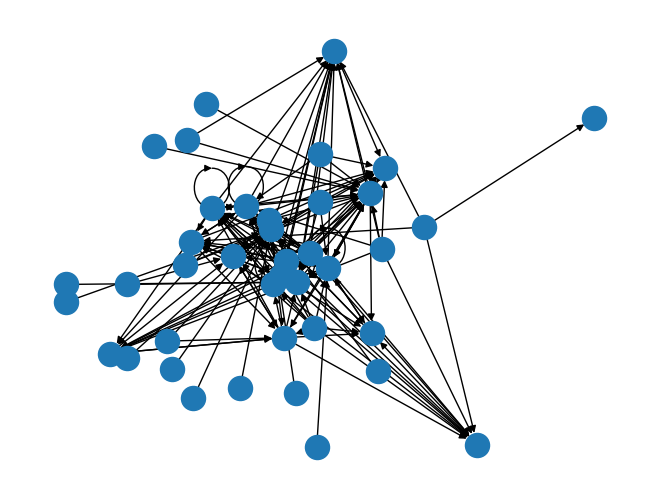

In [32]:
# your solution here
nx.draw(DG)

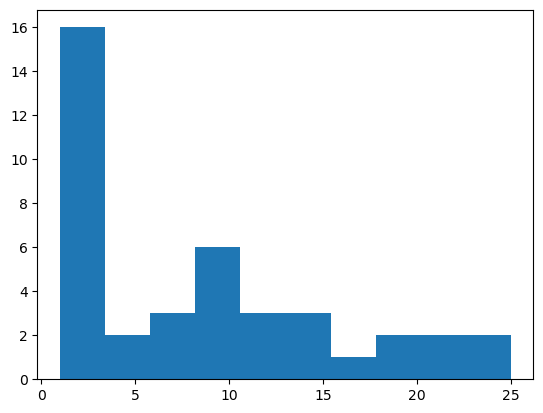

In [33]:
# your solution here
plot_degree_dist(DG)

## Trophic Species

#### Defining the trophic pattern key
this is a way to generate a unique key starting from the ordered lists of preys and predators attached to nodes

In [35]:
def get_node_key(node: int) -> list:
    """
    :param node: Integer that represents a node in a directed graph.

    :return out_list: Sorted list with destination nodes of outgoing
    and incoming edges.
    """
    # Collect destinations of outgoing edges in a list
    out_list = []
    for out_edge in DG.out_edges(node):
        out_list.append(out_edge[1])

    # Collect destinations of incoming edges in a list
    in_list = []
    for in_edge in DG.in_edges(node):
        in_list.append(in_edge[0])

    out_list.sort()
    out_list.append('-')
    in_list.sort()
    out_list.extend(in_list)

    return out_list

#### Grouping the Trophic Species and Regenerating the Trophic network

In [36]:
def TrophicNetwork(DG: nx.DiGraph) -> nx.DiGraph:
    """
    :param DG: A directed graph

    :return DG: A directed graph
    """
    trophic = {}

    # Create dictionary with node keys:
    # Each key is created by get_node_key function, key value is the node
    for n in DG.nodes():
        k = tuple(get_node_key(n))
        if not k in trophic:
            trophic[k] = []

        trophic[k].append(n)

    # Loop through all keys and removed redundant nodes
    for species in trophic.keys():
        if len(trophic[species]) > 1:
            for n in trophic[species][1:]:
                DG.remove_node(n)
    return DG

# deleting the environment
# DG.remove_node('0')

TrophicDG = TrophicNetwork(DG)
print("S:", TrophicDG.number_of_nodes())
print("L:", TrophicDG.number_of_edges())
print("L/S:", float(TrophicDG.number_of_edges()) / TrophicDG.number_of_nodes())

S: 32
L: 146
L/S: 4.5625


### Classes in Food Webs

In [37]:
def compute_classes(DG: nx.DiGraph) -> tuple:
    """
    :param DG: A directed graph

    :return: A tuple of lists, where each list represents
    a species class:
    Basal, Intermediate or Top
    """
    basal_species = []
    top_species = []
    intermediate_species = []

    # Remember: incoming edges means hunting, outgoing means being hunted!
    for n in DG.nodes():
        if DG.in_degree(n) == 0:
            basal_species.append(n)
        elif DG.out_degree(n) == 0:
            top_species.append(n)
        else:
            intermediate_species.append(n)

    return basal_species, intermediate_species, top_species

B, I, T = compute_classes(TrophicDG)
n_classes = len(B) + len(T) + len(I)

print(f"Total Number of Species: {n_classes}")
print(f"Basal: {len(B)}")
print(f"Top: {len(T)}")
print(f"Intermediate: {len(I)}")

print ("Percentage of B:", float(len(B)) / (n_classes))
print ("Percentage of I:", float(len(I)) / (n_classes))
print ("Percentage of T:", float(len(T)) / (n_classes))

Total Number of Species: 32
Basal: 16
Top: 1
Intermediate: 15
Percentage of B: 0.5
Percentage of I: 0.46875
Percentage of T: 0.03125


#### Proportion of links among classes and ratio prey/predators

In [38]:
def InterclassLinkProportion(DG: nx.DiGraph, C1: list, C2: list) -> float:
    """
    :param DG: A directed graph
    :param C1: List of nodes that belong to a class of species
    (Base, Intermediate, Top)
    :param C2: A class of species (Base, Intermediate, Top)

    :return: Proportion of links between pairs of classes against the
    total number of edges
    """
    count = 0
    for n1 in C1:
        for n2 in C2:
            if DG.has_edge(n1, n2):
                count += 1

    prop = float(count) / DG.number_of_edges()
    return round(prop, 3)

print("links in BT:", InterclassLinkProportion(TrophicDG, B, T))
print("links in BI:", InterclassLinkProportion(TrophicDG, B, I))
print("links in II:", InterclassLinkProportion(TrophicDG, I, I))
print("links in IT:", InterclassLinkProportion(TrophicDG, I, T))

# Ratio prey / predators
print("P/R:", float((len(B) + len(I))) / (len(I) + len(T)))

links in BT: 0.007
links in BI: 0.466
links in II: 0.527
links in IT: 0.0
P/R: 1.9375
